In [1]:
import os
os.chdir('/home/jennifer.badolato/watttime-python-client-aer-algo/')

In [2]:
import numpy as np
import pandas as pd
import datetime
import random
import pytz
from datetime import datetime, timedelta
import random
from watttime import WattTimeMyAccess, WattTimeHistorical, WattTimeForecast, WattTimeMaps
import os
import optimizer.dataset as od
from evaluation.config import MOER_REGION_LIST
import evaluation.eval_framework as evu
import optimizer.s3 as s3u

import seaborn as sns
import matplotlib.pyplot as plt

username = os.getenv("WATTTIME_USER")
password = os.getenv("WATTTIME_PASSWORD")

In [21]:
import importlib
importlib.reload(evu)

<module 'evaluation.eval_framework' from '/home/jennifer.badolato/watttime-python-client-aer-algo/evaluation/eval_framework.py'>

In [22]:
start = "2024-02-01 00:00Z"
end = "2024-02-15 00:00Z"

distinct_date_list = [
    pd.Timestamp(date).replace(tzinfo=pytz.UTC)
    for date in pd.date_range(start, end, freq="d", tz=pytz.UTC).values
]

In [23]:
dfs = evu.execute_synth_data_process(distinct_date_list, number_of_users=1000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.08it/s]


## Distributions

In [25]:
dfs.uncharged.value_counts()

uncharged
False    14577
True       423
Name: count, dtype: int64

Text(0.5, 1.0, 'length_plugged_in')

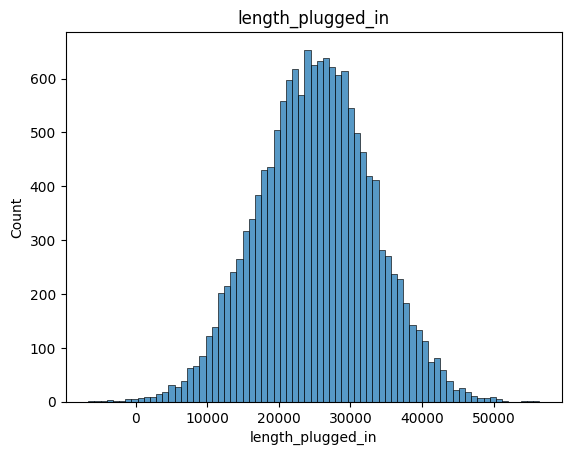

In [26]:
sns.histplot(dfs["length_plugged_in"]).set_title("length_plugged_in")

Text(0.5, 1.0, 'total_seconds_to_95')

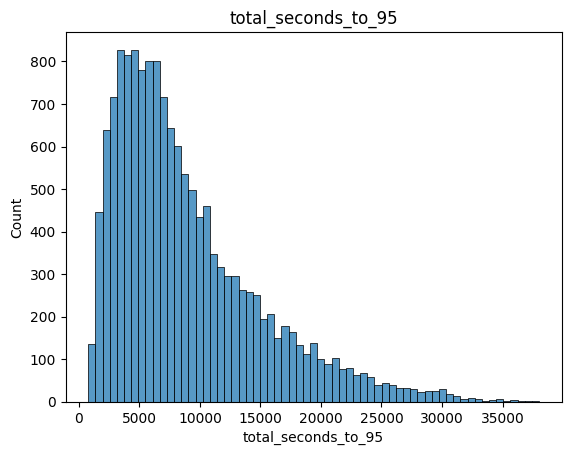

In [27]:
sns.histplot(dfs["total_seconds_to_95"]).set_title("total_seconds_to_95")

Text(0.5, 1.0, 'final_perc_charged')

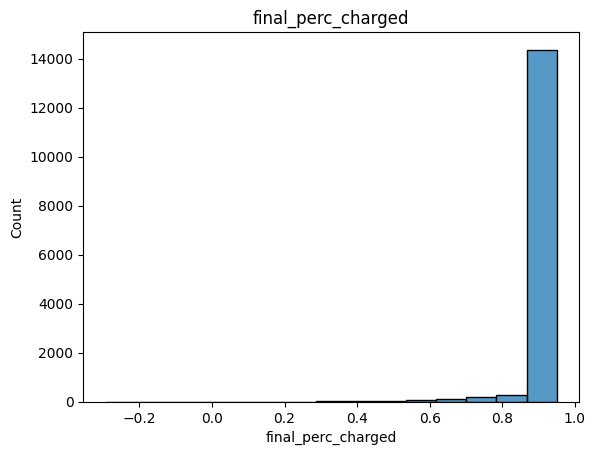

In [28]:
sns.histplot(dfs["final_perc_charged"]).set_title("final_perc_charged")

Text(0.5, 1.0, 'total_capacity')

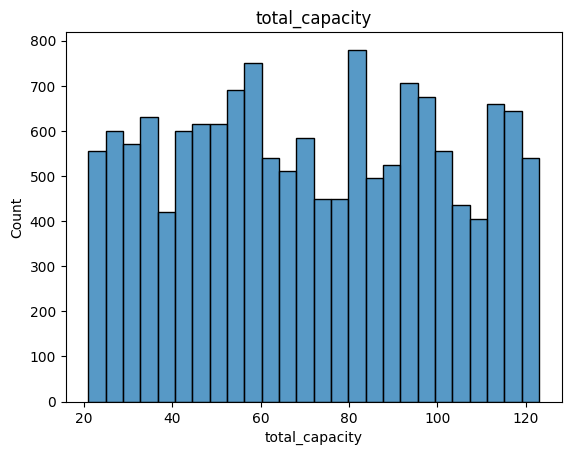

In [30]:
sns.histplot(dfs["total_capacity"]).set_title("total_capacity")

Text(0.5, 1.0, 'power_output_max_rate')

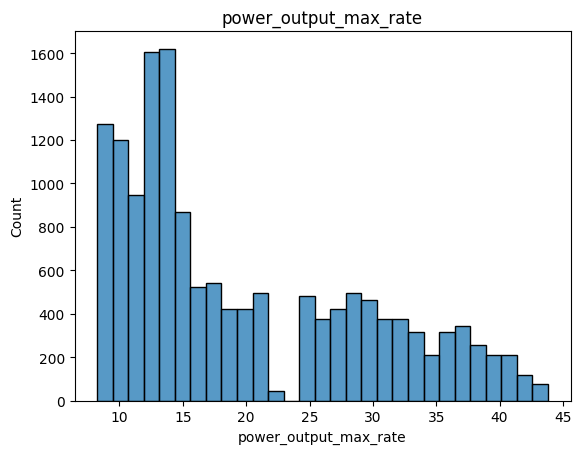

In [31]:
sns.histplot(dfs["power_output_max_rate"]).set_title("power_output_max_rate")

- TODO: plug + unplug needs to be specified in a local time + converted to UTC

In [32]:
dfs.head()

,index,distinct_dates,user_type,plug_in_time,unplug_time,initial_charge,total_seconds_to_95,full_charge_time,length_plugged_in,session_charge,final_perc_charged,final_charge_time,uncharged,total_capacity,power_output_max_rate
0,0,2024-02-01 00:00:00+00:00,r32.68945022288261_tc45_avglc27544_sdlc7924,2024-02-01 20:18:14+00:00,2024-02-02 03:29:45.004203+00:00,0.357399,2936.767149,2024-02-01 21:07:10.767148560+00:00,25891.004203,26.667029,0.95,2024-02-01 21:07:10.767148560+00:00,False,45,32.68945
1,1,2024-02-02 00:00:00+00:00,r32.68945022288261_tc45_avglc27544_sdlc7924,2024-02-02 17:22:57+00:00,2024-02-03 00:45:08.563072+00:00,0.383663,2806.613138,2024-02-02 18:09:43.613137970+00:00,26531.563072,25.485178,0.95,2024-02-02 18:09:43.613137970+00:00,False,45,32.68945
2,2,2024-02-03 00:00:00+00:00,r32.68945022288261_tc45_avglc27544_sdlc7924,2024-02-03 18:40:44+00:00,2024-02-03 21:41:07.964719+00:00,0.377569,2836.814160,2024-02-03 19:28:00.814159585+00:00,10823.964719,25.759415,0.95,2024-02-03 19:28:00.814159585+00:00,False,45,32.68945
3,3,2024-02-04 00:00:00+00:00,r32.68945022288261_tc45_avglc27544_sdlc7924,2024-02-04 19:54:27+00:00,2024-02-05 08:47:09.827499+00:00,0.240907,3514.073713,2024-02-04 20:53:01.073712638+00:00,46362.827499,31.909205,0.95,2024-02-04 20:53:01.073712638+00:00,False,45,32.68945
4,4,2024-02-05 00:00:00+00:00,r32.68945022288261_tc45_avglc27544_sdlc7924,2024-02-05 17:35:43+00:00,2024-02-06 01:24:29.315034+00:00,0.580155,1832.849834,2024-02-05 18:06:15.849834353+00:00,28126.315034,16.643015,0.95,2024-02-05 18:06:15.849834353+00:00,False,45,32.68945
